**<font size=5> Module Title: Machine Learning for AI </font>**

**<font size=5> Assessment Title: ML_CA2 </font>**

**<font size=4> Lecturer Name: Dr. David McQuaid </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

**<font size=3> GitHub Link: https://github.com/Awa25/ML_CA2 </font>**

## Scenario:

This CA consists of 2 parts. Neural Networks and Semantic analysis.

<font size = 4> <b><u> Neural Networks </u></b></font>

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame.
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.


<font size = 4> <b><u> Semantic Analysis </u></b></font>

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.

<font size = 4> <b><u> Requirements </u></b></font>

- Perform any preparation of the data (for both the Neural Network and Semantic Analysis data) , that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you. [0-30]
- Create and implement at least 1 Regression algorithm and 1 Neural Network that will output a Prediction of the “Income(Thousands’)” of the customers. Test these models and try to improve it as you see fit discussing your rationale. Discuss your findings and final rational for choosing a particular Regression algorithm. [0-40]
- Make a Prediction of a new customers income, who is not available in the original dataset. [0-5]
- Perform Sentiment analysis on your text data and discuss your findings in detail. [0-20]
- Visualize your sentiment analysis showing the positive, neutral, negative sentiment expressed. [0-5]

# Part 1: Neural Networks

## • Install the necessary libraries

In [1]:
!pip install tensorflow

## • Import necessary libraries

In [245]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## • Data Loading and Exploration

<font size = "3"> Predicting Customer Income using Neural Networks </font>

In [246]:
# Load the dataset
df = pd.read_csv('BankRecords.csv')

In [247]:
# Display the first few rows of the dataframe
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [248]:
# Rename the columns for clarity
df.rename(columns = {'Income(Thousands\'s)': 'Income(Thousands)'}, inplace = True)

### • Data Exploration Let's explore the dataset to understand its structure and identify any potential issues.

In [249]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands)      5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [250]:
# Summary statistics of the dataset
df.describe()

,ID,Age,Experience(Years),Income(Thousands),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [251]:
# Check for missing values
df.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands)        0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

### • Data Preprocessing We'll handle missing values, encode categorical variables, and normalize the data.

In [252]:
# Convert all column names to strings
df.columns = df.columns.astype(str)

In [253]:
# Define feature columns and target column
feature_columns = df.columns.difference(['Income(Thousands)'])
target_column = 'Income(Thousands)'

In [254]:
# Separate features and target
X = df[feature_columns]
y = df[target_column]

In [255]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [256]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [257]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [258]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [259]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## • Neural Network Model

In [261]:
from tensorflow.keras.layers import Dropout

# Build the neural network with dropout regularization
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [262]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

In [263]:
# Train the model - 100 epochs and validation_step at 0.2
history = model.fit(
    X_train, 
    y_train, 
    epochs = 100, 
    batch_size = 32, 
    validation_split = 0.2, 
    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7662.9258 - mae: 74.1410 - val_loss: 5153.5156 - val_mae: 58.2564
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3883.8247 - mae: 47.5775 - val_loss: 1435.2521 - val_mae: 27.0392
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1652.4209 - mae: 31.6330 - val_loss: 1223.2849 - val_mae: 24.5602
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1613.5272 - mae: 30.8312 - val_loss: 1182.1520 - val_mae: 23.7852
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1454.4031 - mae: 29.3547 - val_loss: 1171.2042 - val_mae: 23.6606
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1443.9254 - mae: 29.0523 - val_loss: 1140.5867 - val_mae: 23.2799
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1397.3884 - mae: 28.5438 - val_loss: 1122.4888 - val_mae: 23.3803
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1324.9442 - mae: 27.8210 - val_loss: 1133.9293 - v

Epoch 52/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1070.0238 - mae: 25.0788 - val_loss: 807.9474 - val_mae: 22.0898
Epoch 53/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1030.0193 - mae: 24.7446 - val_loss: 791.4141 - val_mae: 22.2081
Epoch 54/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1078.1233 - mae: 25.8718 - val_loss: 790.5137 - val_mae: 22.1662
Epoch 55/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1065.8833 - mae: 25.4362 - val_loss: 796.7479 - val_mae: 22.0308
Epoch 56/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1025.3540 - mae: 24.8864 - val_loss: 783.7653 - val_mae: 22.0701
Epoch 57/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1043.4182 - mae: 24.9704 - val_loss: 801.8897 - val_mae: 22.1661
Epoch 58/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1076.8588 - mae: 25.6601 - val_loss: 808.3340 - val_mae: 22.2626
Epoch 59/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1099.0029 - mae: 25.4479 - val_loss: 792.0115 - v

In [264]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)

# Calculate Mean Squared Error
mse = loss 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 960.4232 - mae: 23.2852  


In [265]:
#print(f"Test Loss: {loss}")

print("Mean Absolute Error on Test Set:", mae)
print("Mean Squared Error on Test Set:", mse)

Mean Absolute Error on Test Set: 22.946157455444336
Mean Squared Error on Test Set: 870.6461181640625


In [267]:
# Predict the values on test data and check the accuracy of the model
nn_predictions = model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [268]:
print(f'Neural Network MSE: {nn_mse}')

Neural Network MSE: 870.6460859454817


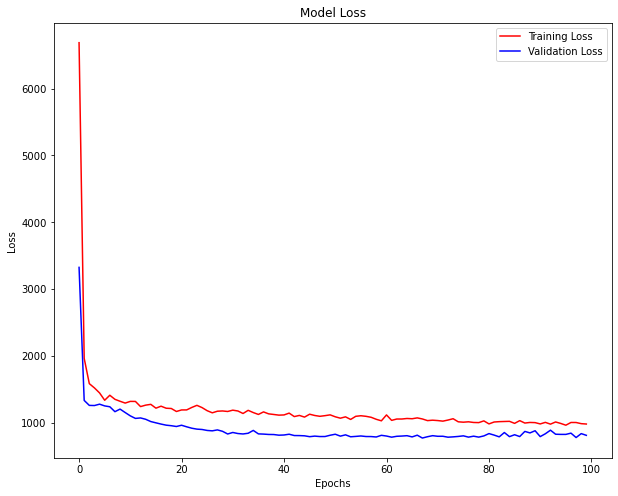

In [321]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

### • Fine tunning Model

In [270]:
from tensorflow.keras.optimizers import Adam

# Define a custom learning rate
learning_rate = 0.001

In [272]:
# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [273]:
# Compile the model with a custom learning rate
optimizer = Adam(learning_rate = learning_rate)
model.compile(optimizer = optimizer, loss = 'mean_squared_error')

In [274]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    batch_size = 32, 
                    validation_split = 0.2, 
                    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7285.9639 - val_loss: 3287.8665
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2606.5381 - val_loss: 1359.8868
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1732.3239 - val_loss: 1313.5305
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1625.6345 - val_loss: 1246.9181
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1476.3583 - val_loss: 1229.3400
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1432.4586 - val_loss: 1176.9489
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1363.0251 - val_loss: 1131.8478
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1304.7798 - val_loss: 1148.0856
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1360.5762 - val_loss: 1116.3030
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1281.2095 - val_loss: 1072.0919
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1316.61

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1063.2795 - val_loss: 779.5829
Epoch 66/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1009.9433 - val_loss: 775.8812
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1060.5792 - val_loss: 787.5904
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1071.1498 - val_loss: 765.8272
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1057.5009 - val_loss: 785.5611
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1003.8801 - val_loss: 763.1037
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1060.2030 - val_loss: 761.0461
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 995.8908 - val_loss: 792.6194
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1022.1414 - val_loss: 761.0567
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1005.6943 - val_loss: 776.5274
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1000.8203 - val_loss: 

In [275]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss with Custom Learning Rate: {loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 894.9697 
Test Loss with Custom Learning Rate: 809.3402709960938


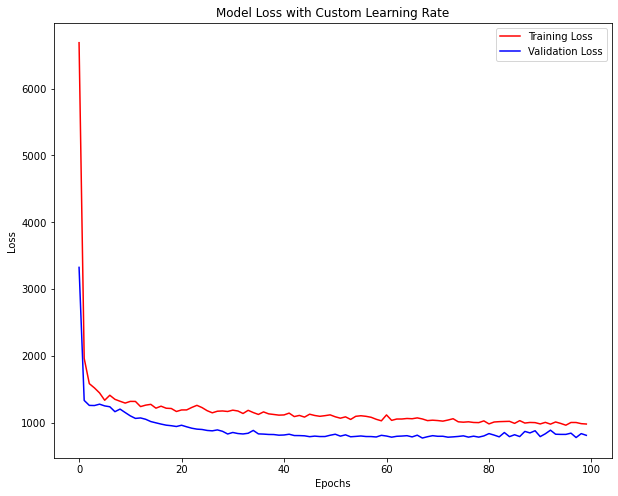

In [319]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss with Custom Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

### • Fine Tune more

In [277]:
from tensorflow.keras.regularizers import l2

# Build the neural network with L2 regularization
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dense(1, activation = 'linear', kernel_regularizer = l2(0.01)))

In [278]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [279]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    batch_size = 32, 
                    validation_split = 0.2, 
                    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7029.9751 - val_loss: 3325.1392
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2436.8127 - val_loss: 1333.7333
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1643.3171 - val_loss: 1259.0728
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1542.7943 - val_loss: 1257.0514
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1491.6396 - val_loss: 1277.4109
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1425.4556 - val_loss: 1251.5366
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1352.9526 - val_loss: 1238.7106
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1403.4935 - val_loss: 1165.0835
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1271.4481 - val_loss: 1203.7426
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1287.1057 - val_loss: 1152.3495
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1267.11

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1057.8737 - val_loss: 805.6527
Epoch 66/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1047.2986 - val_loss: 787.5030
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1072.0920 - val_loss: 813.2092
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1029.7401 - val_loss: 770.6221
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1012.3209 - val_loss: 790.2341
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1070.6826 - val_loss: 805.8546
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1035.9528 - val_loss: 796.8281
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 995.8584 - val_loss: 797.0553
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1081.0645 - val_loss: 783.1475
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1067.3224 - val_loss: 788.0440
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 974.4861 - val_loss: 7

In [280]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss with L2 Regularization: {loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 967.3527  
Test Loss with L2 Regularization: 877.7364501953125


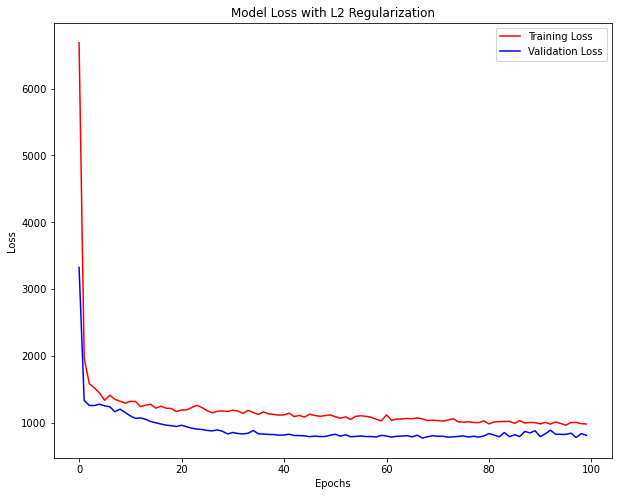

In [318]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

## • Random Forest Regressor

In [282]:
# Separate features and target
X = df.drop(columns = ['Income(Thousands)'])
y = df['Income(Thousands)']

In [283]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [284]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [285]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [286]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [287]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [288]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [289]:
# Predict and evaluate the model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor Test MSE: {rf_mse}")

Random Forest Regressor Test MSE: 436.6706159


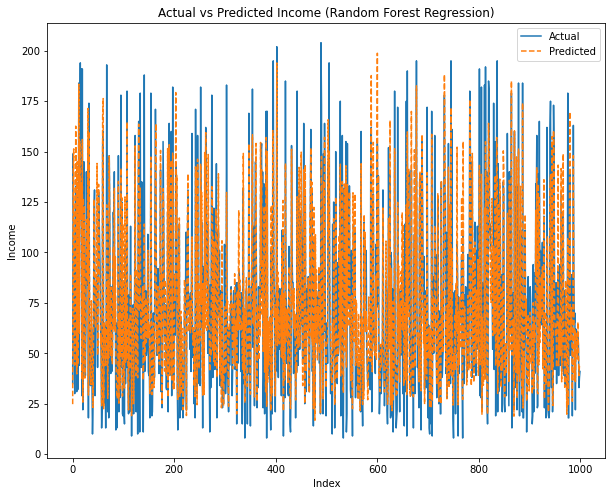

In [290]:
# Plot actual vs predicted values for Random Forest Regression
plt.figure(figsize = (10, 8))
plt.plot(y_test.values, label='Actual')
plt.plot(rf_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Income (Random Forest Regression)')
plt.xlabel('Index')
plt.ylabel('Income')
plt.legend()
plt.show()

## • Comparing of both Models

In [291]:
# Evaluate the neural network model
#nn_loss = model.evaluate(X_test, y_test)
#print(f"Neural Network Test MSE: {nn_loss}")

print(f'\n• Neural Network Test MSE: {nn_mse}\n')

# Random Forest Regressor Results
print(f"• Random Forest Regressor Test MSE: {rf_mse}")


• Neural Network Test MSE: 870.6460859454817

• Random Forest Regressor Test MSE: 436.6706159


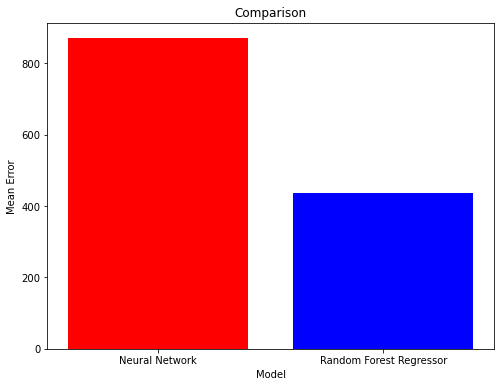

In [292]:
# Plot comparing
plt.figure(figsize = (8, 6))
plt.bar(['Neural Network', 'Random Forest Regressor'], 
        [nn_mse, rf_mse], 
        color = ['red', 'blue'])

plt.title('Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Error')
plt.show()

## • Make a Prediction of a new customers income, who is not available in the original dataset

In [300]:
# Set the random seed to ensure reproducibility
np.random.seed(42)

In [301]:
# Generate the number of rows for the dataset
num_rows = 2000

In [302]:
# Generate random data using numpy
data = {
    "ID": np.arange(1, num_rows + 1),
    "Experience(Years)": np.random.randint(1, 42, size = num_rows),
    "Income(Thousands)": np.random.randint(45000, 60001, size = num_rows),
    "Sort Code": np.random.randint(90000, 95001, size = num_rows),
    "Education": np.random.choice(["Diploma", "Degree", "Masters"], size = num_rows),
    "Mortgage_Thousands": np.random.randint(0, 156, size = num_rows),
    "Personal Loan": np.random.choice(["Yes", "No"], size = num_rows),
}

In [303]:
# Creat DataFrame
df = pd.DataFrame(data)

In [304]:
# Convert the Education and Personal Loan columns to numerical values
df['Education'] = df['Education'].map({'Diploma': 1, 'Degree': 2, 'Masters': 3})
df['Personal Loan'] = df['Personal Loan'].map({'No': 0, 'Yes': 1})

In [305]:
# Separate features and labels
X = df.drop(columns = ['ID', 'Income(Thousands)'])
y = df['Income(Thousands)'] / 1000  # Convert income to thousands

In [306]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [307]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [310]:
# Build a neural network model
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))  # Output layer

In [311]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse')

In [312]:
# Train the model
model.fit(X_train, y_train, epochs = 100, batch_size = 10, validation_split = 0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2694.1179 - val_loss: 937.7686
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 325.4630 - val_loss: 51.3586
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.7887 - val_loss: 44.2725
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37.8161 - val_loss: 40.3050
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.6681 - val_loss: 36.6245
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.4187 - val_loss: 33.1979
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.9747 - val_loss: 30.1719
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.0833 - val_loss: 28.5183
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24.2280 - val_loss: 27.1628
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.1958 - val_loss: 25.3480
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.8558 - val_loss: 23.9531
Epoch 12/100
12

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4229 - val_loss: 20.6746
Epoch 68/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.4211 - val_loss: 20.1665
Epoch 69/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.6507 - val_loss: 20.5321
Epoch 70/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.2136 - val_loss: 20.8636
Epoch 71/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9372 - val_loss: 19.9056
Epoch 72/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.1870 - val_loss: 20.7622
Epoch 73/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3418 - val_loss: 19.7342
Epoch 74/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.2096 - val_loss: 20.1452
Epoch 75/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.7526 - val_loss: 20.1553
Epoch 76/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.9386 - val_loss: 20.1795
Epoch 77/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.2551 - val_loss: 20.3613
Epoch 78/100
128/128 ━━

In [313]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.2524
Model Loss: 18.880706787109375


In [314]:
# Predict income for new customers
# New customer data should have the same number and order of features as the training data
new_customers = np.array([
    [28, 92000, 2, 50, 1],  # Example of new customer 1
    [50, 91000, 3, 100, 0]  # Example of new customer 2
])  # Example new customer data

In [315]:
# Standardize new data
new_customers = scaler.transform(new_customers)  
predictions = model.predict(new_customers)
print(f'Predicted Income (in thousands): {predictions.flatten()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Income (in thousands): [50.113815 54.442253]


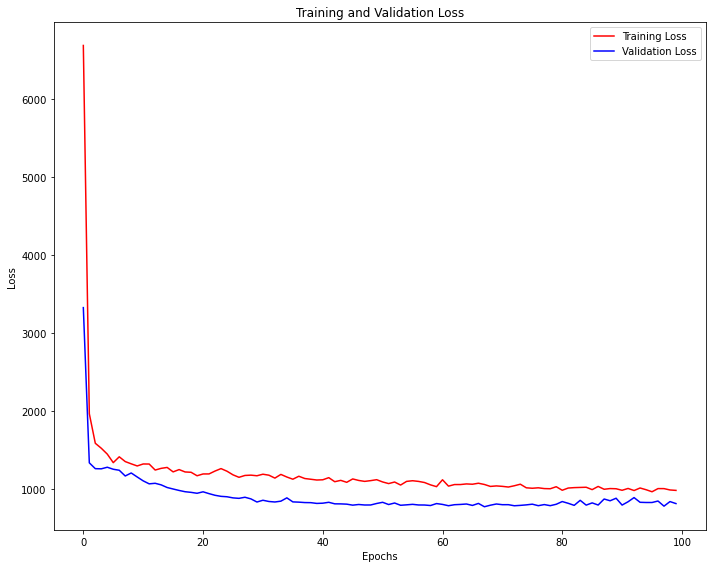

In [316]:
# Plot predictions
plt.figure(figsize=(10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()